## Cómo calcular estadísticas resumen usando Pandas
***
### Objetivo
En este notebook se explicarán los principales métodos de agregación de datos utilizando las herramientas de la librería Pandas.

### Tabla de Contenido

0. [Cargar Librerías](#Cargar-Librerías)

1. [Lectura de archivos](#Lectura-de-archivos)
2. [Agregación de estadísticas](#Agregación-de-estadísticas)
3. [Agregación de estadísticas agrupadas por categoría](#Agregación-de-estadísticas-agrupadas-por-categoría)
- [Agrupar por una columna](#Agrupar-por-una-columna)
- [Agrupar por dos columnas](#Agrupar-por-dos-columnas)

## <font color=#33A5FF>****0. Cargar librerías****<tfont>
***

In [1]:
# importar libreria
import pandas as pd

## <font color=#33A5FF>****1. Lectura de archivos excel****<tfont>
***

Para leer ficheros de excel puedes instalar en el anaconda Prom la librería `openpyxl`

Instalar o actualizar la librería `openpyxl`

* Instalar: `pip install openpyxl`
* Actualizar: `pip install --upgrade openpyxl`

Nota: Después de instalar o actualizar es necesario actualizar el Kernel.

In [6]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Cargar datos
titanic = pd.read_excel('titanic.xlsx', index_col = 0)
titanic

,Survived,Clase,Nombre,Sexo,Edad,Familiares,Tiquete,Tarifa,Cabina,Embarcado
Id_Pasajero,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Masculino,22.0,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Femenino,38.0,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",Femenino,26.0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Femenino,35.0,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",Masculino,35.0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Masculino,27.0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",Femenino,19.0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Femenino,NaN,2,W./C. 6607,23.45,NaN,S


Descripción del las columnas del DataFrame

* **Id_Pasajero:** Id de cada pasajero.

* **Survived:** esta característica tiene valor 0 y 1. 0 para no sobrevivido y 1 para sobrevivido.

* **Clase:** Hay 3 clases: Clase 1, Clase 2 y Clase 3.

* **Nombre:** Nombre del pasajero.

* **Sexo:** Género del pasajero.

* **Edad:** Edad del pasajero.

* **Familiares:** numero de familiares del pasajero.

* **Ticket:** Número de ticket del pasajero.

* **Tarifa:** Indicando la tarifa.

* **Cabina:** La cabina del pasajero.

* **Embarcado:** La categoría embarcada.

In [10]:
# Leer datos excel con ruta, en caso de que el archivo se encuentre en una ruta diferente 
titanic.tail()

,Survived,Clase,Nombre,Sexo,Edad,Familiares,Tiquete,Tarifa,Cabina,Embarcado
Id_Pasajero,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",Masculino,27.0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",Femenino,19.0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Femenino,NaN,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",Masculino,26.0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",Masculino,32.0,0,370376,7.75,NaN,Q


In [11]:
# Verificar que los datos estén leidos correctamente
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Clase       891 non-null    int64  
 2   Nombre      891 non-null    object 
 3   Sexo        891 non-null    object 
 4   Edad        714 non-null    float64
 5   Familiares  891 non-null    int64  
 6   Tiquete     891 non-null    object 
 7   Tarifa      891 non-null    float64
 8   Cabina      204 non-null    object 
 9   Embarcado   889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


## <font color=#33A5FF>****2. Agregación de estadísticas****<tfont>

#### ¿Cúal es la edad media de los pasajeros?

In [14]:
# Edad media de los pasajeros 
titanic['Edad'].mean()

29.69911764705882

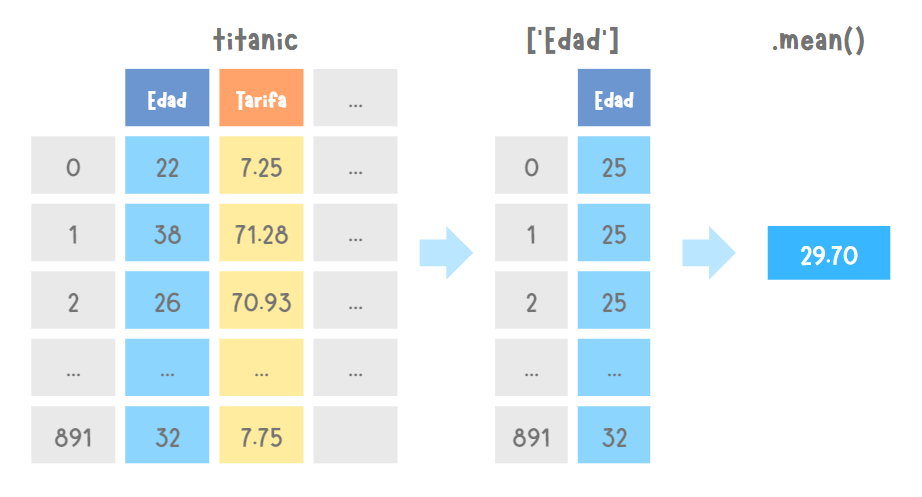
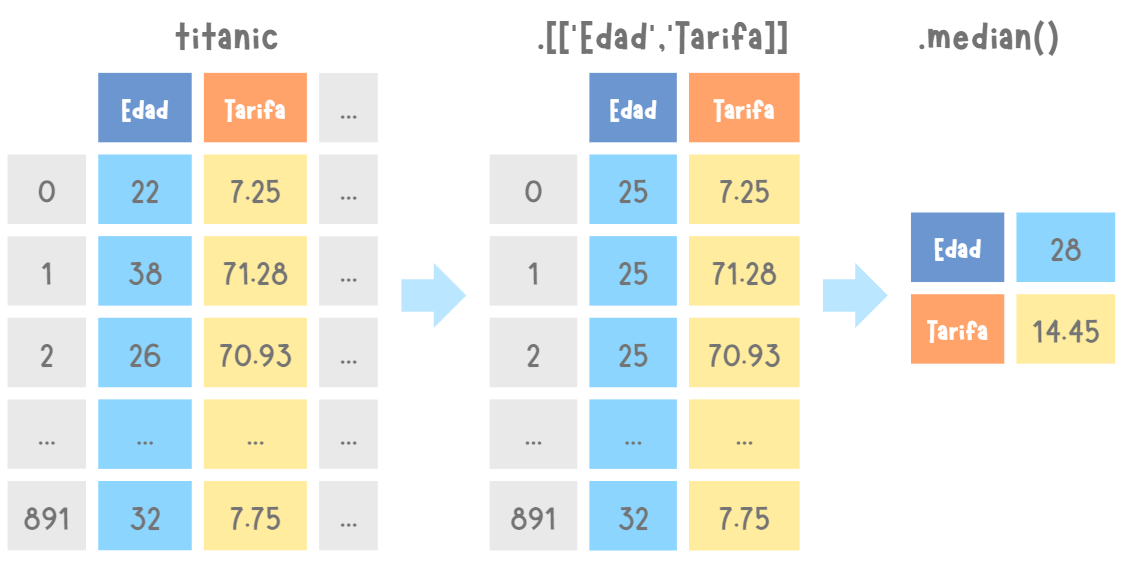

La estadística de agregación también se puede calcular a varias columnas al mismo tiempo.

#### ¿Cuál es la edad media y el precio del billete de los pasajeros del Titanic?

In [18]:
titanic.columns

Index(['Survived', 'Clase', 'Nombre', 'Sexo', 'Edad', 'Familiares', 'Tiquete',
       'Tarifa', 'Cabina', 'Embarcado'],
      dtype='object')

In [19]:
# Cual es la mediana de la edad y la tarifa
titanic[['Edad', 'Tarifa']].mean()

Edad      29.699118
Tarifa    32.205017
dtype: float64

Al igual que en otros videos, también podemos aplicar el método describe a una o varias columnas.

In [21]:
titanic[['Edad', 'Tarifa']].describe()

,Edad,Tarifa
count,714.000000,891.000000
mean,29.699118,32.205017
std,14.526497,49.693389
min,0.420000,0.000000
25%,20.125000,7.915000
50%,28.000000,14.450000
75%,38.000000,31.000000
max,80.000000,512.330000


En lugar de las estadísticas predefinidas (como lo vimos en el método `describe`), se pueden definir combinaciones específicas de estadísticas de agregación para columnas determinadas utilizando 

In [23]:
# Método agg
titanic.agg(
    {
        "Edad": ["min", "max", "median", "count"],
        "Tarifa": ["min", "max", "median", "var"]
    }
)

,Edad,Tarifa
min,0.42,0.00000
max,80.00,512.33000
median,28.00,14.45000
count,714.00,NaN
var,NaN,2469.43287


Acá les dejo más detalles sobre las estadísticas descriptivas que se pueden usar.

<div style="text-align: center;">

| **Función**  | **Descripción**                                                |
|--------------|----------------------------------------------------------------|
| `count`      | Número de observaciones no NA                                   |
| `sum`        | Suma de valores                                                 |
| `mean`       | Media de valores                                                |
| `median`     | Mediana aritmética de valores                                   |
| `min`        | Mínimo                                                          |
| `max`        | Máximo                                                          |
| `mode`       | Modo                                                            |
| `abs`        | Valor absoluto                                                  |
| `prod`       | Producto de valores                                             |
| `std`        | Desviación estándar de la muestra corregida por Bessel          |
| `var`        | Varianza imparcial                                              |
| `sem`        | Error estándar de la media                                      |
| `skew`       | Asimetría de la muestra (tercer momento)                        |
| `kurt`       | Curtosis de muestra (4º momento)                                |
| `quantile`   | Cuantil de muestra (valor en %)                                 |
| `cumsum`     | Suma acumulada                                                  |
| `cumprod`    | Producto acumulativo                                            |
| `cummax`     | Máximo acumulado                                                |
| `cummin`     | Mínimo acumulativo                                              |
</div>

[📚 Guía completa: Estadísticas básicas con Pandas](https://pandas.pydata.org/docs/user_guide/basics.html#basics-stats)

## <font color=#33A5FF>****3. Agregación de estadísticas agrupadas por categoría****<tfont>

* Método ``groupby()``

### <font color=#33A5FF>****3.1. Agrupar por una columna****<tfont>

#### ¿Cuál era la edad promedio de los pasajeros hombres y mujeres del Titanic?

#### Flujo de trabajo 1

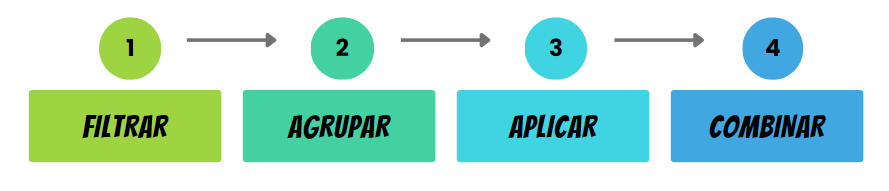

> 🔄 Los pasos de aplicar y combinar normalmente se realizan juntos en pandas.

In [34]:
# Filtrar df['Sexo', 'Edad']], agrupar por sexo y luego calcular la media para cada grupo
titanic[['Edad', 'Sexo']].groupby('Sexo').mean()

,Edad
Sexo,
Femenino,27.915709
Masculino,30.726645


#### Flujo de trabajo 2

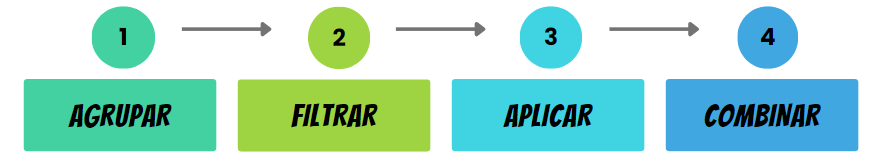

In [37]:
titanic.groupby('Sexo')['Edad'].mean()

Sexo
Femenino     27.915709
Masculino    30.726645
Name: Edad, dtype: float64

También se podria aplicar el método ``groupby()``a todo el ``DataFrame``

In [39]:
titanic.groupby('Sexo').mean(numeric_only = True)

,Survived,Clase,Edad,Familiares,Tarifa
Sexo,,,,,
Femenino,0.742038,2.159236,27.915709,0.649682,44.480446
Masculino,0.188908,2.389948,30.726645,0.235702,25.524801


### <font color=#33A5FF>****3.2. Agrupar por dos columnas****<tfont>

#### ¿Cuál es el precio medio de la tarifa del billete para cada una de las combinaciones de sexo y clase de cabina?

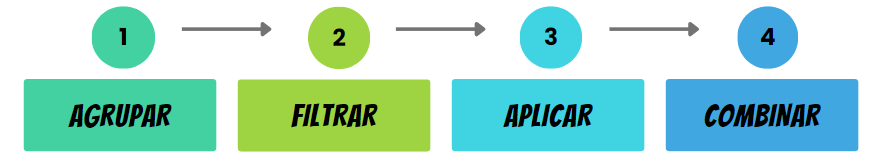

In [62]:
titanic.groupby(['Sexo', 'Clase'])['Edad'].mean()

Sexo       Clase
Femenino   1        34.611765
           2        28.722973
           3        21.750000
Masculino  1        41.281386
           2        30.740707
           3        26.507589
Name: Edad, dtype: float64

### <font color=#33A5FF>****3.3. Contar el número de registros por categoría****<tfont>

#### ¿Cuál es el número de pasajeros en cada una de las clases de cabina?

In [73]:
titanic.groupby('Clase')['Clase'].count()

Clase
1    216
2    184
3    491
Name: Clase, dtype: int64

In [75]:
titanic['Clase'].value_counts()

Clase
3    491
1    216
2    184
Name: count, dtype: int64

<div style="border-left: 4px solid #2196F3; background-color: #E3F2FD; padding: 10px; border-radius: 5px;">
    <strong style="color: #1976D2;"><i class="fa fa-info-circle" aria-hidden="true"></i> Información</strong>
    <p>
Las estadísticas de agregación se pueden calcular en columnas o filas enteras.

groupby proporciona el poder del patrón dividir-aplicar-combinar .

value_counts es un atajo conveniente para contar el número de entradas en cada categoría de una variable.
</div>